# Project: No-show appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Data set (No-Show appointments)contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments. And some other information about each patient, for example, Patient Id, Gender, Age, Handicap, Diabetes, Hypertension, Alcoholism, and Scholarship (indicates whether or not the patient is enrolled in the Brasilian welfare program Bolsa Família) and whether the patient received a reminder message for the appointment.
 And also some information about the appointment and Hospital location such as Appointment ID, scheduled day (what day the patient set up their appointment), appointment day and Neighborhood of the hospital.
 
Here we will focus on what factors affect whether the patient show or didn't to the appointment. the first question is whether the age factor affect patient show or not?
and we wonder if the patient who receives an SMS-message will show to the appointment or not, also What are the most three hospitals that patients don't show-appointment?

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [48]:
df =pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### these are the first 5 rows from the data set that above mentioned.

In [49]:
df.shape

(110527, 14)

##### The Data set contains 110526 and 9 colums 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### We observe that The Data Set has no missing values(Null), which is good but we should exclude some of the columns that we won't use in analysis and also make sure the age has no negative values.

In [51]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### Some statistic about the data

### Data Cleaning 

The data set has no missing values (Null), But we have to make sure that the age contain no negative values

In [52]:
df.drop(df[df['Age']<=-1].index,inplace=True)

Excluding some columns that we won't use in analysis

In [53]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

Overview of the Data after excluding some columns

In [54]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Is the age of the patients affect the attendence ?!)

In [55]:
print("Here is the Distribution of age of the data set and we see the the rage is from ",min(df['Age'])," to ",max(df['Age']))

Here is the Distribution of age of the data set and we see the the rage is from  0  to  115


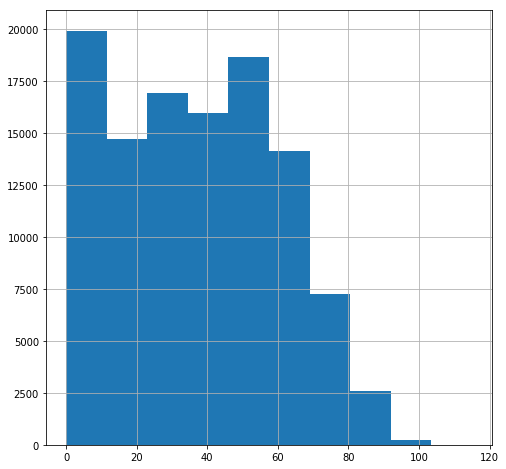

In [56]:
df['Age'].hist(figsize=(8,8));


taking the patients who did not show to the appointment, as a sample to discover what the range of their age.

In [57]:
no_show=df[df['No-show']=='Yes'];

divide the age of the patients into two sections (above 50) and (below 50).

In [58]:
no_show_above50= no_show[no_show['Age']>50].size

no_show_below50=no_show[no_show['Age']<=50].size

visualizing the results by plotting them into a pie and bar charts

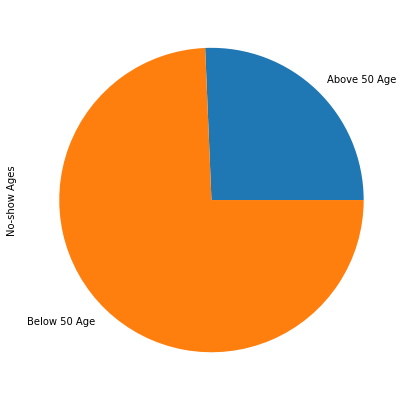

In [59]:
Types = ['Above 50 Age','Below 50 Age']

series = pd.Series([no_show_above50,no_show_below50],index=Types, name='No-show Ages')

series.plot.pie(figsize=(8, 7));


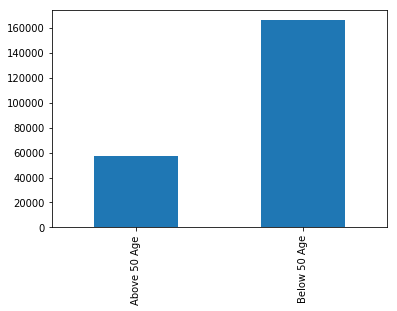

In [60]:
series.plot.bar();

#### from the results above we conclude that the people who older than 50 years committed to attending their appointments, Unlike people who are younger than 50 years.

### Research Question 2  (are the patients who received an SMS-message to remember the appointment did show?)

taking the patients who received an SMS-message as sample.

In [61]:
MS_received=df[df['SMS_received']==1]

taking the number of people who received as SMS-message and show

In [62]:
SMS_received_show=SMS_received[SMS_received['No-show']=='No'].size

taking the number of people who received as SMS-message and didn't show

In [63]:
SMS_received_no_show=SMS_received[SMS_received['No-show']=='Yes'].size

Making sure that the size of the total SMS_received equal the size of received and show, received and didn't show

In [64]:
SMS_received.size==SMS_received_show+SMS_received_no_show

True

visualizing the results by plotting them into a pie and bar charts

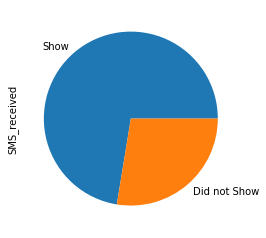

In [65]:
Receives_show = ['Show','Did not Show']

series1 = pd.Series([SMS_received_show,SMS_received_no_show], index=Receives_show, name='SMS_received')

series1.plot.pie();

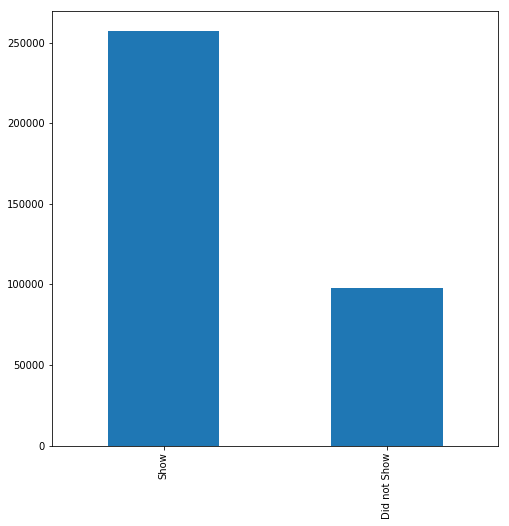

In [66]:
series1.plot.bar(figsize=(8, 8));

#### from the results above we conclude that the most of people who received an SMS-message committed to attending their appointments.

### Research Question 3  ( What are the most three hospitals that patients don't show-appointment?)

Here is the hospitals Neighbourhood and the number of no-show appointment at each

In [67]:
no_show['Neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
JESUS DE NAZARETH               696
JARDIM DA PENHA                 631
CARATOÍRA                       591
TABUAZEIRO                      573
BONFIM                          550
ILHA DO PRÍNCIPE                532
ANDORINHAS                      521
SÃO PEDRO                       515
SANTO ANDRÉ                     508
SANTA MARTHA                    496
SANTO ANTÔNIO                   484
ROMÃO                           474
GURIGICA                        456
JABOUR                          451
DA PENHA                        429
SÃO JOSÉ                        428
MARUÍPE                         424
NOVA PALESTINA                  402
BELA VISTA                      384
SANTOS DUMONT                   369
SÃO CRISTÓVÃO                   363
ILHA DE SANTA MARIA             361
FORTE SÃO JOÃO              

visualizing the results by plotting them into a bar charts

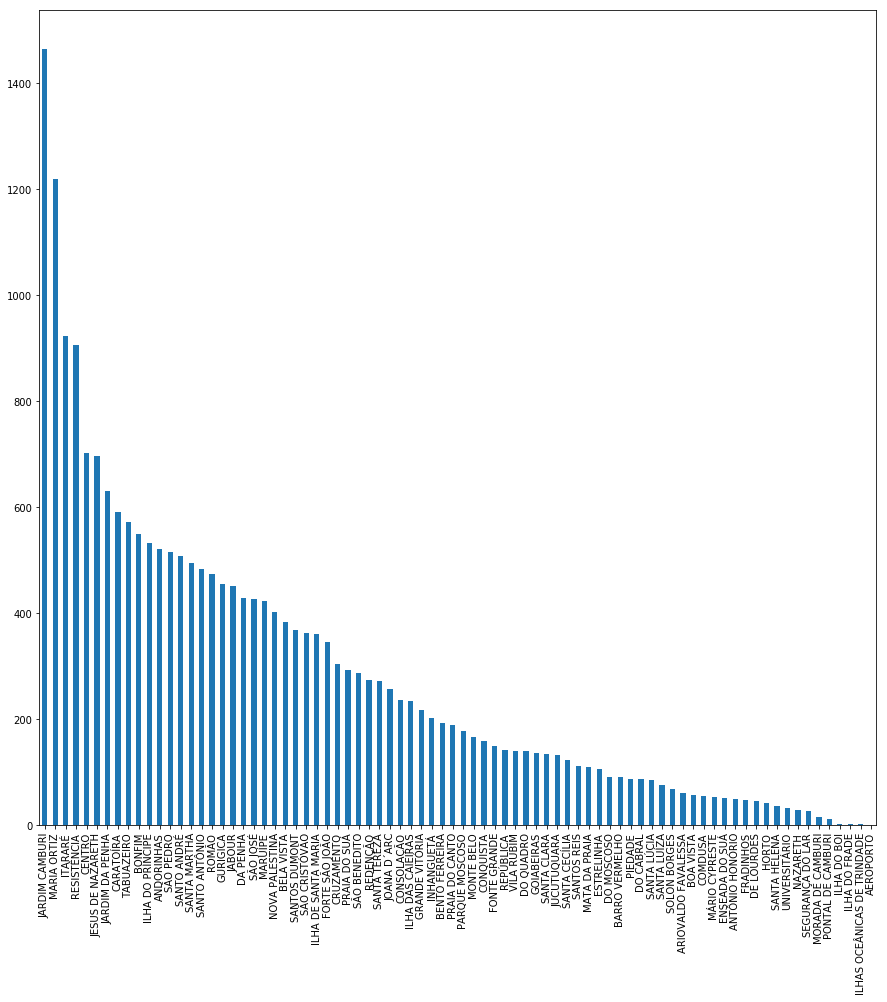

In [68]:
no_show['Neighbourhood'].value_counts().plot(kind='bar',figsize=(15,15));

By looking at the bar chart above we observe that the most three hospitals that patients don't attend their appointments are **JARDIM CAMBURI**, **MARIA ORTIZ**, and **ITARARÉ** respectively.

<a id='conclusions'></a>
## Conclusions
There are some factors affect whether the patient show or didn't to the appointment. the first factor is the age, if the patient is younger than 50 years old the percent of missing the appointment rises.
Another factor is receiving an SMS-message Increases attendance percent of the patient.
Also, the most three hospitals that patients don't show-appointment are 
are **JARDIM CAMBURI**, **MARIA ORTIZ**, and **ITARARÉ** respectively.